In [352]:
import pandas as pd
import numpy as np
import pickle

In [353]:
path = "../Data/Barca/05Stage/Tables/Filtered/Score/Individual/0_1_filteredIndividualMetrics.pkl"
#path = "../Data/RVallecano/05Stage/Tables/Score/Global/globalMetrics.pkl"
#path = "../Data/Barca/05Stage/Tables/Filtered/Player/5216_filteredIndividualMetrics.pkl"
#path = "../Data/Barcelonaaa/04Stage/Metrics/Individual/IndividualnetworkMetrics.pkl"

In [354]:
def load_metrics(file):
    try:
        with open(file, "rb") as f:
            deserializedFile = pickle.load(f)
        return deserializedFile
    except FileNotFoundError:
        print(f"File  not found.")


In [355]:
data = {
    'A': [1, 2, None, 4],
    'B': [5, None, 7, 8],
    'C': [9, 10, 11, None]
}
df = pd.DataFrame(data)

# Drop NaN values from rows
df_without_nan = df.dropna(axis=0)

print(df_without_nan)

     A    B    C
0  1.0  5.0  9.0


In [356]:
def load_scores(scores):
    try:
        # Open the CSV file
        # Create a CSV reader object
        dfScore = pd.read_csv(scores)
        return dfScore
    except FileNotFoundError:
        print("The file does not exist.")
    except Exception as e:
        print("An error occurred:", e)

In [357]:
file = load_metrics(path)

In [358]:
#print(file.columns)

In [359]:
#headers = set(header[0] for header in file.columns)
#headers

In [360]:
file

inD                         outD                        clust        \
       Mean   Std Count      Class  Mean   Std Count      Class  Mean   Std   
6616   0.40  0.38     2     medium  0.29  0.00     2        bad  0.72  0.21   
5503   0.39  0.26     5     medium  0.31  0.35     5        bad  0.52  0.21   
5203   0.64  0.31     8  excellent  0.60  0.36     9       good  0.54  0.26   
6379   0.57  0.21     7       good  0.60  0.17     7       good  0.73  0.23   
5506   0.55  0.23     7       good  0.47  0.44     7     medium  0.55  0.27   
4691   0.12  0.17     7      worst  0.21  0.18     7      worst  0.80  0.19   
4324   0.33  0.21     5        bad  0.41  0.27     5     medium  0.10  0.23   
4320   0.63  0.34     8  excellent  0.61  0.37     9       good  0.42  0.35   
5213   0.58  0.35     8       good  0.65  0.31     8  excellent  0.42  0.34   
11094  0.35  0.03     2        bad  0.21  0.10     2      worst  0.76  0.34   
6998   0.46  0.29     2     medium  0.29  0.40     2        bad  0.70  0.18   
5470   0.53  0.21     6       good  0.66  0.24     6  excellent  0.56  0.24   
5211   0.60  0.31     7       good  0.78  0.20     7  excellent  0.37  0.32   
5216   0.56  0.43     4       good  0.44  0.36     4     medium  0.67  0.20   
5246   0.65  0.26     8  excellent  0.12  0.13     8      worst  0.69  0.32   
20055  0.31  0.44     2        bad  0.64  0.51     2       good  0.60  0.33   
10609  0.37  0.21     5     medium  0.42  0.36     5     medium  0.76  0.28   
3508   0.72  0.39     2  excellent  0.21  0.30     2      worst  0.30  0.42   

       ...  clos            eigenv                         ecce              \
       ... Count      Class   Mean   Std Count      Class  Mean   Std Count   
6616   ...     2       good   0.62  0.00   1.0       good  1.00  0.00   1.0   
5503   ...     5     medium   0.54  0.33   3.0     medium  0.83  0.29   3.0   
5203   ...     8  excellent   0.56  0.32   7.0     medium  0.29  0.39   7.0   
6379   ...     7       good   0.51  0.35   5.0     medium  0.40  0.42   5.0   
5506   ...     7       good   0.40  0.29   6.0        bad  0.58  0.49   6.0   
4691   ...     7      worst   0.13  0.15   5.0      worst  0.60  0.42   5.0   
4324   ...     5        bad   0.69  0.27   4.0       good  0.25  0.29   4.0   
4320   ...     8  excellent   0.58  0.26   7.0     medium  0.14  0.24   7.0   
5213   ...     8  excellent   0.50  0.33   6.0     medium  0.42  0.49   6.0   
11094  ...     2     medium   0.00  0.00   0.0      worst  0.00  0.00   0.0   
6998   ...     2       good   0.41  0.00   1.0     medium  0.50  0.00   1.0   
5470   ...     6       good   0.47  0.30   6.0     medium  0.33  0.41   6.0   
5211   ...     7  excellent   0.50  0.35   6.0     medium  0.50  0.45   6.0   
5216   ...     4       good   0.56  0.38   4.0     medium  0.50  0.41   4.0   
5246   ...     8  excellent   0.59  0.32   7.0     medium  0.86  0.24   7.0   
20055  ...     2        bad   0.00  0.00   2.0      worst  0.50  0.00   2.0   
10609  ...     5     medium   0.23  0.23   4.0        bad  0.38  0.48   4.0   
3508   ...     2  excellent   1.00  0.00   2.0  excellent  0.75  0.35   2.0   

                  
           Class  
6616   excellent  
5503   excellent  
5203         bad  
6379         bad  
5506      medium  
4691      medium  
4324         bad  
4320       worst  
5213      medium  
11094      worst  
6998      medium  
5470         bad  
5211      medium  
5216      medium  
5246   excellent  
20055     medium  
10609        bad  
3508        good  

[18 rows x 28 columns]

In [361]:
headers = set(header[0] for header in file.columns)
    
for header in headers:
    classifyValues = pd.cut(
        np.array(file[(f"{header}", "Mean")]),
        5,
        labels=["wortst","bad", "medium", "good", "excellent"],
        duplicates='drop'  # Set duplicates to 'drop'
    ).astype(str)
    columnClassifiy = pd.DataFrame({'Class': classifyValues}, index=file[(f"{header}", "Mean")].index)
    print(columnClassifiy)

           Class
6616   excellent
5503   excellent
5203         bad
6379         bad
5506      medium
4691      medium
4324         bad
4320      wortst
5213      medium
11094     wortst
6998      medium
5470         bad
5211      medium
5216      medium
5246   excellent
20055     medium
10609        bad
3508        good
           Class
6616      wortst
5503      medium
5203      medium
6379         bad
5506         bad
4691      wortst
4324   excellent
4320        good
5213        good
11094     wortst
6998      wortst
5470      medium
5211        good
5216      medium
5246      wortst
20055     wortst
10609     wortst
3508        good
           Class
6616        good
5503      medium
5203      medium
6379      medium
5506         bad
4691      wortst
4324        good
4320      medium
5213      medium
11094     wortst
6998      medium
5470      medium
5211      medium
5216      medium
5246      medium
20055     wortst
10609        bad
3508   excellent
           Class
6616   excelle

In [362]:
max_value = file[('inD', 'Count')].max()
print(max_value)
# Step 2: Calculate the threshold (1/4 of the maximum value)
threshold = max_value / 4
print(threshold)
# Step 3: Filter the DataFrame
filtered_df = file[file[('inD', 'Count')] >= threshold]

print("\nFiltered DataFrame:\n", filtered_df)

8
2.0

Filtered DataFrame:
         inD                         outD                        clust        \
       Mean   Std Count      Class  Mean   Std Count      Class  Mean   Std   
6616   0.40  0.38     2     medium  0.29  0.00     2        bad  0.72  0.21   
5503   0.39  0.26     5     medium  0.31  0.35     5        bad  0.52  0.21   
5203   0.64  0.31     8  excellent  0.60  0.36     9       good  0.54  0.26   
6379   0.57  0.21     7       good  0.60  0.17     7       good  0.73  0.23   
5506   0.55  0.23     7       good  0.47  0.44     7     medium  0.55  0.27   
4691   0.12  0.17     7      worst  0.21  0.18     7      worst  0.80  0.19   
4324   0.33  0.21     5        bad  0.41  0.27     5     medium  0.10  0.23   
4320   0.63  0.34     8  excellent  0.61  0.37     9       good  0.42  0.35   
5213   0.58  0.35     8       good  0.65  0.31     8  excellent  0.42  0.34   
11094  0.35  0.03     2        bad  0.21  0.10     2      worst  0.76  0.34   
6998   0.46  0.29     2 

In [363]:
a = pd.cut(np.array(file[("inD", "Mean")]), 5,
       labels=["worst", "bad", "medium", "good", "excellent"])

b = pd.cut(np.array(file[("outD", "Mean")]), 5, labels=["worst", "bad", "medium", "good", "excellent"])

In [364]:
print(a)
print("")
print(b)

['medium', 'medium', 'excellent', 'good', 'good', ..., 'good', 'excellent', 'bad', 'medium', 'excellent']
Length: 18
Categories (5, object): ['worst' < 'bad' < 'medium' < 'good' < 'excellent']

['bad', 'bad', 'good', 'good', 'medium', ..., 'medium', 'worst', 'good', 'medium', 'worst']
Length: 18
Categories (5, object): ['worst' < 'bad' < 'medium' < 'good' < 'excellent']


GRÀFICS

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt

In [366]:
categories = ['excellent', 'good', 'medium', 'bad', 'worst']
cat_type = pd.CategoricalDtype(categories=categories, ordered=True)
file[('inD', 'Class')] = file[('inD', 'Class')].astype(cat_type)

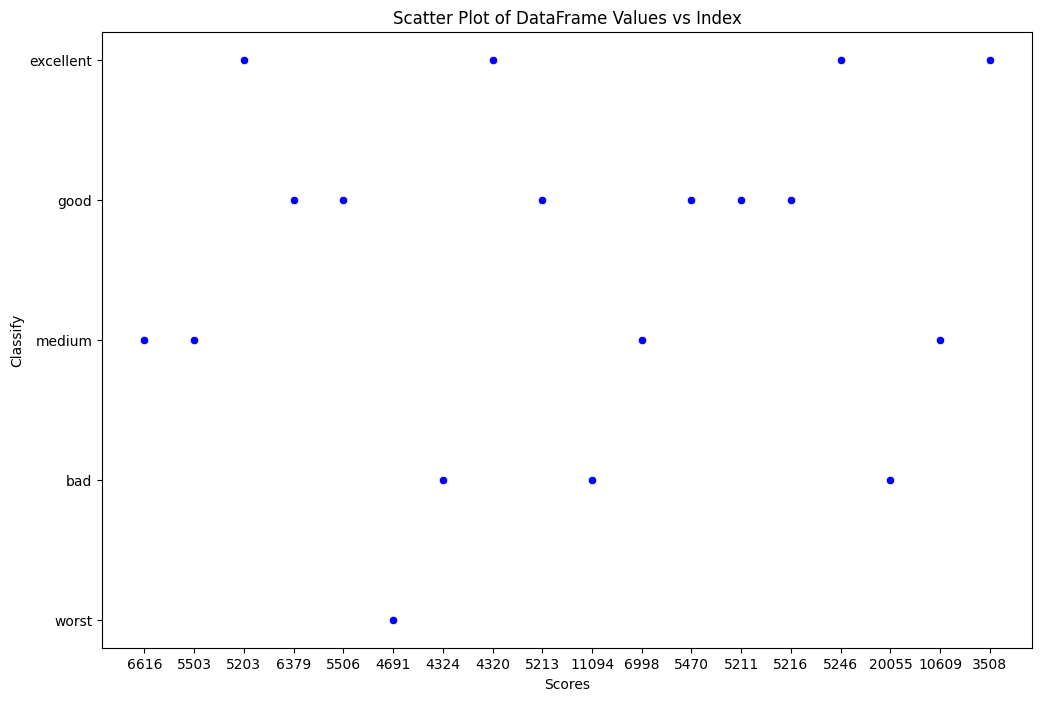

In [367]:
plt.figure(figsize=(12,8 ))
sns.scatterplot(x=file.index, y=file[("inD","Class")], color='blue')

# Adding titles and labels
plt.title('Scatter Plot of DataFrame Values vs Index')
plt.xlabel('Scores')
plt.ylabel('Classify')

# Displaying the plot
plt.grid(False)
plt.show()